# Preparing Data

In [1]:
import pandas as pd
import numpy as np

dfs = []
for i in range(2017,2022):
    year_df = pd.read_csv(f"./data/csv/{i}_lake_data.csv")
    year_df.insert(1,"Year",i)
    dfs.append(year_df)

df = pd.concat(dfs)
df

,STN Code,Year,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,...,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,2017,"PULICATE LAKE , NELLORE \r\nDIST.",LAKE,ANDHRA \r\nPRADESH,27.0,28.0,5.1,6.9,7.1,...,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,2017,"KONDACHARLA-AAVA LAKE, \r\nPARAWADA PHARMA CIT...",LAKE,ANDHRA \r\nPRADESH,24.0,28.0,5.9,6.8,6.9,...,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,2017,"MER BEEL AT MADHABPUR, \r\nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,...,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,2017,"DALONI BEEL NEAR \r\nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,...,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,1263.0,2017,ELANGABEEL SYSTEM POND \r\n(CONNECTED TO R. KO...,POND,ASSAM,22.0,34.0,0.7,4.6,6.8,...,263.0,972.0,4.5,14.7,0.8,5.7,1100.0,3500.0,730.0,21000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1765.0,2021,"RABINDRASAROVAR NATIONAL LAKE, \r\nCALCUTTA, W...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,...,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
616,2544.0,2021,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,...,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
617,2522.0,2021,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,...,13,29,1.0,1.1,0.30,0.30,70,110,110,210
618,2521.0,2021,"WATER RESERVIOR AT DELO LAKE, \r\nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,...,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [3]:
#using only data of lakes
df = df[df["Type Water Body"]=="LAKE"]

#drop rows containing blank values
df = df.dropna()

#some entries in the pdf have - to represent a blank value so we must remove those as well
bad_vals = df.apply(lambda x:x=="-").any(axis=1)
bad_idx = bad_vals.index[bad_vals]
df = df.drop(bad_idx)

#replace below detection level with 0
df = df.replace("BDL",0)

df.reset_index(inplace=True,drop=True)
df

,STN Code,Year,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,...,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,2017,"PULICATE LAKE , NELLORE \r\nDIST.",LAKE,ANDHRA \r\nPRADESH,27.0,28.0,5.1,6.9,7.1,...,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,2017,"KONDACHARLA-AAVA LAKE, \r\nPARAWADA PHARMA CIT...",LAKE,ANDHRA \r\nPRADESH,24.0,28.0,5.9,6.8,6.9,...,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,2017,"MER BEEL AT MADHABPUR, \r\nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,...,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,2017,"DALONI BEEL NEAR \r\nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,...,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,2557.0,2017,"KAWAR LAKE, BEGUSARAI, \r\nBIHAR",LAKE,BIHAR,19.0,32.0,5.4,8.0,7.2,...,222.0,325.0,2.1,2.8,0.0,0.0,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765.0,2021,"RABINDRASAROVAR NATIONAL LAKE, \r\nCALCUTTA, W...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,...,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
1089,2544.0,2021,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,...,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
1090,2522.0,2021,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,...,13,29,1.0,1.1,0.30,0.30,70,110,110,210
1091,2521.0,2021,"WATER RESERVIOR AT DELO LAKE, \r\nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,...,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [5]:
#Required Columns
L = [
  "Min Temperature","Max Temperature","Min Dissolved Oxygen","Max Dissolved Oxygen",
  "Min pH","Max pH","Min Conductivity","Max Conductivity",
  "Min Nitrate N + Nitrite N","Max Nitrate N + Nitrite N",
]
df[L] = df[L].apply(pd.to_numeric)

#dropping redundant columns
df = df.drop(columns=["Name of Monitoring Location","Type Water Body","Min BOD","Max BOD","Min Fecal Coliform","Max Fecal Coliform","Min Total Coliform","Max Total Coliform"],errors='ignore')
df = df.astype({"STN Code":int})
df

,STN Code,Year,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N
0,1790,2017,ANDHRA \r\nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,0.65,6.90
1,2353,2017,ANDHRA \r\nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.16,3.36
2,2205,2017,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,0.10,1.70
3,2206,2017,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.10,1.40
4,2557,2017,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765,2021,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252.0,826.0,0.30,1.90
1089,2544,2021,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311.0,422.0,0.30,0.80
1090,2522,2021,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13.0,29.0,0.30,0.30
1091,2521,2021,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20.0,36.0,0.30,0.30


In [7]:
df.dtypes

STN Code                       int32
Year                           int64
State Name                    object
Min Temperature              float64
Max Temperature              float64
Min Dissolved Oxygen         float64
Max Dissolved Oxygen         float64
Min pH                       float64
Max pH                       float64
Min Conductivity             float64
Max Conductivity             float64
Min Nitrate N + Nitrite N    float64
Max Nitrate N + Nitrite N    float64
dtype: object

# Calculating WQI

To calculate water quality index, we can use the Weighted Arithmetic Mean method

$$ WQI = \frac{\sum q_iw_i}{\sum w_i} $$

Here, $w_i$ represents unit weight of ith parameter towards overall water quality and $q_i$ is the quality estimate of the ith parameter. They can be calculated as follows

$$ q_i = \frac{V_i - V_{ideal} }{S_i - V_{ideal}} * 100 $$

$$ w_i = \frac{K}{S_i} $$

$K$ is the constant of proportionality and is defined by 

$$ K = \frac{1}{\sum \frac{1}{S_i}} $$ <br />


In [9]:
stv = np.array([5,8.5,2250,45])
K = 1/np.sum(stv)
w = [K/x for x in stv]
w_n = np.array([x/sum(w) for x in w])
print(w_n)

[0.58769302 0.34570177 0.00130598 0.06529922]


Using the table, we can calculate the unit weights,

| Parameter | Unit weights ($w_i$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 0.2943 |
| pH | 0.1731 |
| Conductivity (µS/cm) |  0.0007 |
| Biological Oxygen Demand (mg/L) | 0.4904 |
| Nitrate (mg/L) | 0.0327 |
| Fecal Coliform (per 100 mL) | 0.0073 |
| Total Coliform (per 100 mL) | 0.0015 |

In [11]:
idv = np.array([14.6,7,0,0])
diff = stv-idv

def calculate_wqi(row):
    q = 100*(row - idv)/diff
    return np.dot(q,w_n)

example_row = np.array([6.8,7.8,1179,3.56])
calculate_wqi(example_row)

66.77250859986512

# Interpolating Average Statistics

Each of the columns of the data provided has the min and max values for each parameter in a lake.
Since all unit weights are positive and all standard values are greater than ideal values, we can see that WQI is increasing wrt to each parameter. Thus,
$$ WQI_{\text{min}} = \frac{\sum q_{i,\text{min}} \cdot w_i}{\sum w_i} $$

$$ WQI_{\text{max}} = \frac{\sum q_{i,\text{max}} \cdot w_i}{\sum w_i} $$

Assuming that WQI is normally distributed over all the samples for a given lake, the average value of WQI is roughly the arithmetic mean of max and min values.

$$ WQI_{\text{avg}} = \frac{WQI_{\text{min}} + WQI_{\text{max}}}{2} $$

Since WQI is linearly dependent on all variables, this is equivalent to first taking the averages of all variables and then plugging it into the formula, i.e

$$ WQI_{\text{avg}}  = \frac{\sum \frac{q_{i,\text{min}} + q_{i,\text{max}}}{2} \cdot w_i}{\sum w_i} = \frac{\sum q_{i,\text{avg}} \cdot w_i}{\sum w_i} $$


In [13]:
def avg(col1,col2):
    return (col1.to_numpy() + col2.to_numpy())/2

pd.set_option('mode.chained_assignment',None)

df_a = pd.DataFrame()
df_a["Dissolved Oxygen"] = avg(df["Min Dissolved Oxygen"],df["Max Dissolved Oxygen"])
df_a["pH"] = avg(df["Min pH"],df["Max pH"])
df_a["Conductivity"] = avg(df["Min Conductivity"],df["Max Conductivity"])
df_a["Nitrate N + Nitrite N"] = avg(df["Min Nitrate N + Nitrite N"],df["Max Nitrate N + Nitrite N"])
df_a.rename(columns={
    'Dissolved Oxygen':'DO',
    'Conductivity':'EC',
    'Nitrate N + Nitrite N':'NN'
},inplace=True)
df_a

,DO,pH,EC,NN
0,6.00,7.80,79935.0,3.775
1,6.35,7.65,815.5,2.260
2,4.70,6.35,89.0,0.900
3,5.55,7.20,103.5,0.750
4,6.70,7.55,273.5,0.000
...,...,...,...,...
1088,7.45,7.85,539.0,1.100
1089,9.30,7.30,366.5,0.550
1090,7.60,7.25,21.0,0.300
1091,7.70,7.25,28.0,0.300


# Classification of water bodies

In [16]:
wqi = df_a.apply(calculate_wqi,axis=1)
df_a["WQI"] = wqi
df_a = df_a[df_a["WQI"]>=0]
df_a.dropna()
df_a.insert(0,"STN Code",df["STN Code"])
df_a.insert(1,"Year",df["Year"])
df_a

,STN Code,Year,DO,pH,EC,NN,WQI
0,1790,2017,6.00,7.80,79935.0,3.775,76.272443
1,2353,2017,6.35,7.65,815.5,2.260,65.860561
2,2205,2017,4.70,6.35,89.0,0.900,45.761196
3,2206,2017,5.55,7.20,103.5,0.750,60.126507
4,2557,2017,6.70,7.55,273.5,0.000,61.053845
...,...,...,...,...,...,...,...
1088,1765,2021,7.45,7.85,539.0,1.100,63.551559
1089,2544,2021,9.30,7.30,366.5,0.550,39.460671
1090,2522,2021,7.60,7.25,21.0,0.300,48.659064
1091,2521,2021,7.70,7.25,28.0,0.300,48.047290


# Distribution of Data

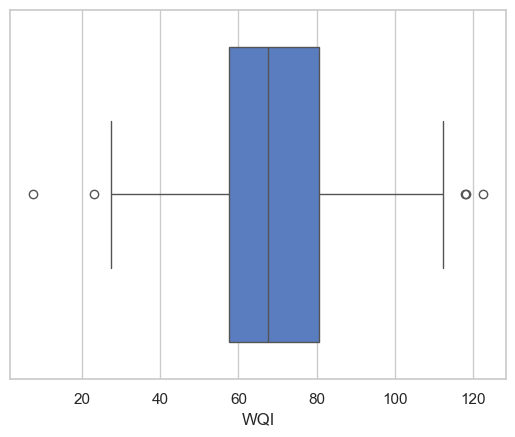

In [18]:
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# seaborn theme defaults
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
sns.set_theme()
sns.set_style("whitegrid")
sns.set_palette("muted")

def boxplot(feature):
    sns.boxplot(data=df_a,x=feature,orient='h')

boxplot("WQI")

We can see that there is an extreme right skew to the WQI, with significant outliers. This leads to nonsensical values for water quality index. Hence, we remove these extreme outliers. For this, we use the a process described in https://www.researchgate.net/publication/245023815_Outlier_detection_for_skewed_data to determine outliers on the right. 

In [26]:
from statsmodels.stats.stattools import medcouple

MC = float(medcouple(df_a["WQI"]))
q1,q3 = np.percentile(df_a["WQI"],[25,75],method='lower')
iqr = q3 - q1
print(f"{MC = }")
print(f"{q1 = }")
print(f"{q3 = }")
print(f"{iqr = }")

MC = 0.15930902187957766
q1 = 57.653346265140456
q3 = 80.51458349338043
iqr = 22.861237228239972


In [28]:
upper_fence = q3 + (1.5*iqr*np.exp(3*MC))
print(upper_fence)

135.8180146380519


In [121]:
df_a = df_a[df_a["WQI"]<upper_fence]
df_a

,STN Code,Year,DO,pH,EC,NN,WQI
0,1790,2017,6.00,7.80,79935.0,3.775,76.272443
1,2353,2017,6.35,7.65,815.5,2.260,65.860561
2,2205,2017,4.70,6.35,89.0,0.900,45.761196
3,2206,2017,5.55,7.20,103.5,0.750,60.126507
4,2557,2017,6.70,7.55,273.5,0.000,61.053845
...,...,...,...,...,...,...,...
1088,1765,2021,7.45,7.85,539.0,1.100,63.551559
1089,2544,2021,9.30,7.30,366.5,0.550,39.460671
1090,2522,2021,7.60,7.25,21.0,0.300,48.659064
1091,2521,2021,7.70,7.25,28.0,0.300,48.047290


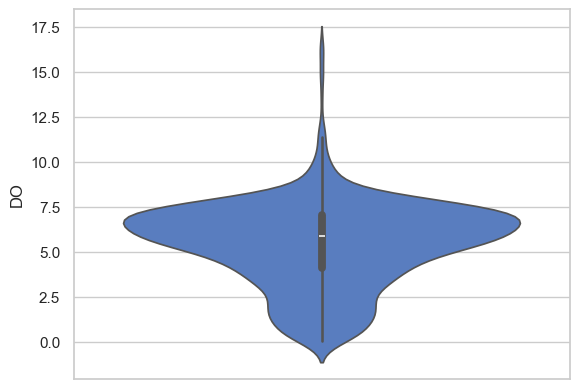

In [30]:
def violinplot(feature):
    sns.violinplot(data=df_a,y=feature,orient='v')
    
violinplot("DO")

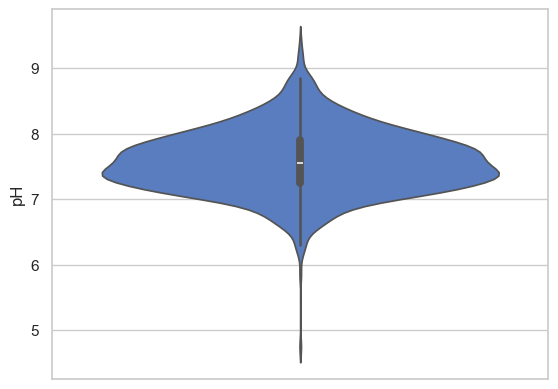

In [32]:
violinplot("pH")

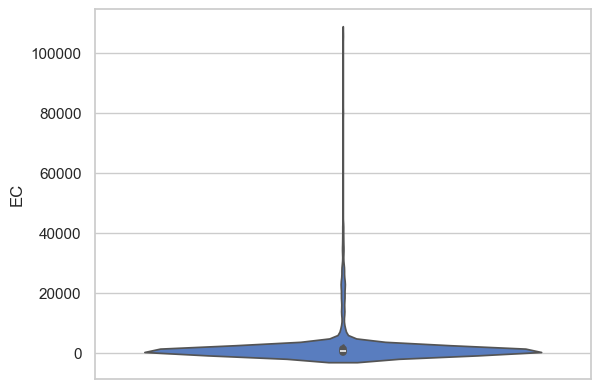

In [34]:
violinplot("EC")

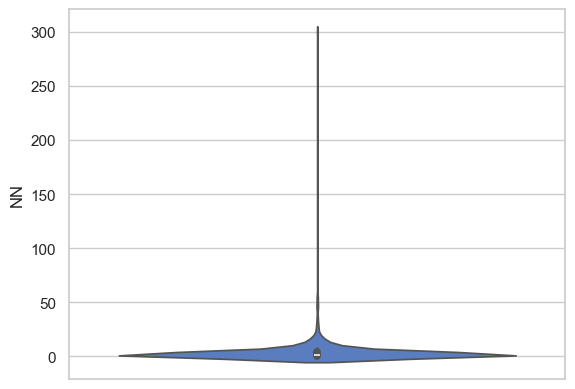

In [36]:
violinplot("NN")

Even after removing extreme values of WQI, we see that most parameters have skewed distributions with outliers. In order to deal with this, we use robust scaling instead of standardizing the data.

In [39]:
counts = [0]*5
counts[0] = len(df_a[df_a["WQI"]<50])
counts[1] = len(df_a[(df_a["WQI"]>=50) & (df_a["WQI"]<100)])
counts[2] = len(df_a[(df_a["WQI"]>=100) & (df_a["WQI"]<200)])
counts[3] = len(df_a[(df_a["WQI"]>=200) & (df_a["WQI"]<300)])
counts[4] = len(df_a[df_a["WQI"]>=300])
print(counts)

[101, 940, 46, 0, 0]


| WQI | Classification | Frequency |
| :-: | :-: | :-: |
| < 50 | Excellent | 84 |
| 50 - 100 | Good | 455 |
| 100 - 200 | Poor | 197 |
| 200 - 300 | Very Poor | 84 |
| > 300 | Unsuitable for Drinking | 235 |

# Predicting WQI with lesser parameters

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

seed = 42
ncols = ["DO","pH","EC","NN"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

s = RobustScaler()
X_train_ = s.fit_transform(X_train)
X_test_ = s.transform(X_test)

sdf = pd.DataFrame(X_train_,columns=ncols)
sdf["WQI"] = pd.Series(y_train).values

sdf

,DO,pH,EC,NN,WQI
0,-0.072727,-0.230769,-0.504510,-0.128521,63.876305
1,1.690909,1.461538,0.268884,-0.345070,59.487603
2,0.690909,-0.230769,-0.626268,-0.422535,50.893085
3,0.418182,1.076923,-0.072717,-0.228873,75.182514
4,-2.127273,-0.230769,0.901353,3.820423,100.164270
...,...,...,...,...,...
864,-1.454545,1.000000,3.342728,2.482394,106.850642
865,-1.763636,-0.307692,0.689966,4.049296,92.973566
866,-0.327273,1.076923,-0.270011,-0.193662,87.736562
867,-0.090909,0.692308,-0.341601,-0.334507,77.933964


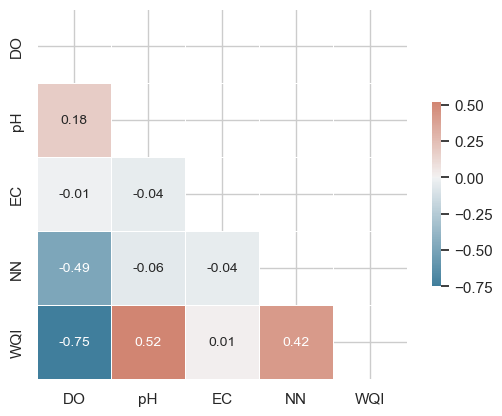

In [45]:
cmatrix = sdf.corr(method='pearson').round(2)
mask = np.triu(np.ones_like(cmatrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cmatrix, mask=mask, cmap=cmap,center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5},annot=True,annot_kws={"fontsize":10})
plt.show()

In order to reduce the number of features required for prediction, we can select the features with higher correlation to WQI and lesser inter correlation. Considering the highest correlations, we get BOD,Fecal Coliform and Total Coliform. Since Total Coliform is highly correlated with Fecal Coliform, we replace it with Dissolved Oxygen for our 3rd feature.

In [47]:
# selected_features = [0,3,5] # DO,BOD,FC
# del_ft = [1,2,4,6]
X_train_ = X_train_
X_test_ = X_test_
print(X_train_.shape)

print("Updated X_train_ shape:", X_train_.shape)
print("Updated X_test_ shape:", X_test_.shape)

(869, 4)
Updated X_train_ shape: (869, 4)
Updated X_test_ shape: (218, 4)


# Training Models

### OLS

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

reg = LinearRegression().fit(X_train_,y_train)
y_hat = reg.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat)}")

RMSE: 2.959725439286359e-14
R2 : 1.0


C:\Users\devan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


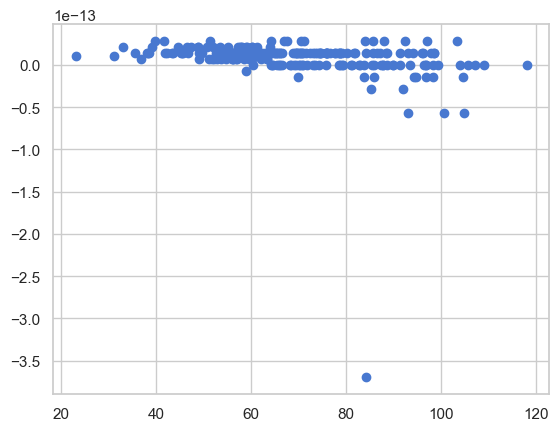

In [51]:
residuals = y_test-y_hat
plt.scatter(y_hat,residuals)
plt.show()

In [53]:
print(reg.coef_)

[-16.83495621  14.98041023   0.05148481   0.41211066]


To repurpose a regression model to classify, we use the previously mentioned WQI to WQC conversion table to convert predicted values for WQI into predicted WQC

Accuracy = 1.0


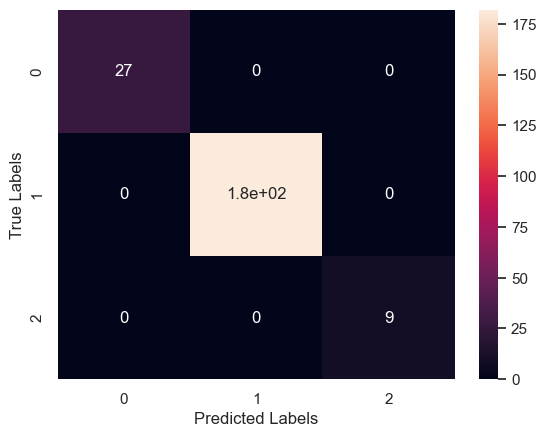

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix

# 0 = Excellent, 1 = Good, 2 = Poor, 3 = Very Poor, 4 = Unsuitable for Drinking
def classify(y):
    y_c = np.zeros_like(y,dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

#testing classification accuracy
y_c = classify(y_test.to_numpy())
y_c_hat = classify(y_hat)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat)}')
cm = confusion_matrix(y_c,y_c_hat)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Support Vector Regression

In [59]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {'C':range(100,1500,100),'epsilon':np.linspace(0.05,0.25,10)}
clf = GridSearchCV(SVR(),params,n_jobs=5)
clf.fit(X_train_,y_train)
reg2 = clf.best_estimator_
y_hat2 = reg2.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat2,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat2)}")

C:\Users\devan\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RMSE: 1.042043901871961
R2 : 0.9965237267499262


C:\Users\devan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


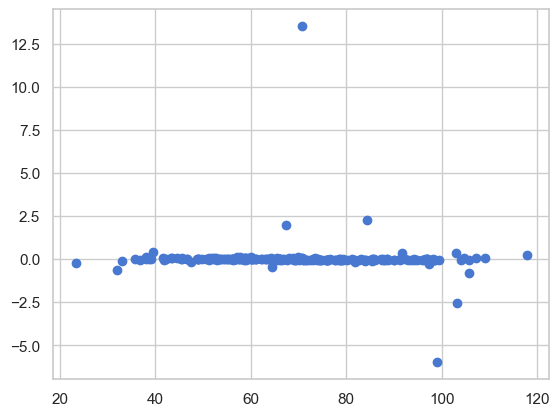

In [60]:
residuals = y_test-y_hat2
plt.scatter(y_hat2,residuals)
plt.show()

Accuracy = 1.0


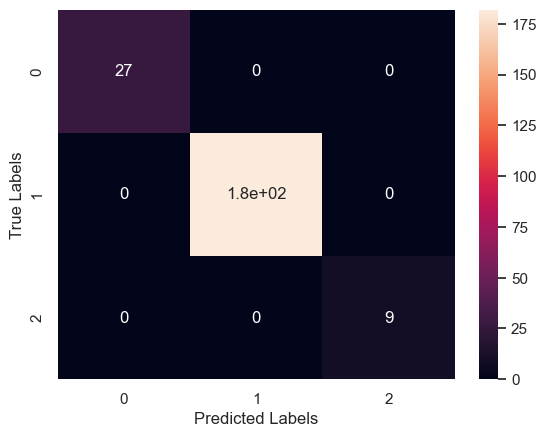

In [160]:
y_c_hat2 = classify(y_hat2)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat2)}')
cm = confusion_matrix(y_c,y_c_hat2)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Models

### Multinomial Logistic Regression

R² Score (Accuracy): 1.0
Mean Squared Error: 1.8638399330879296e-22


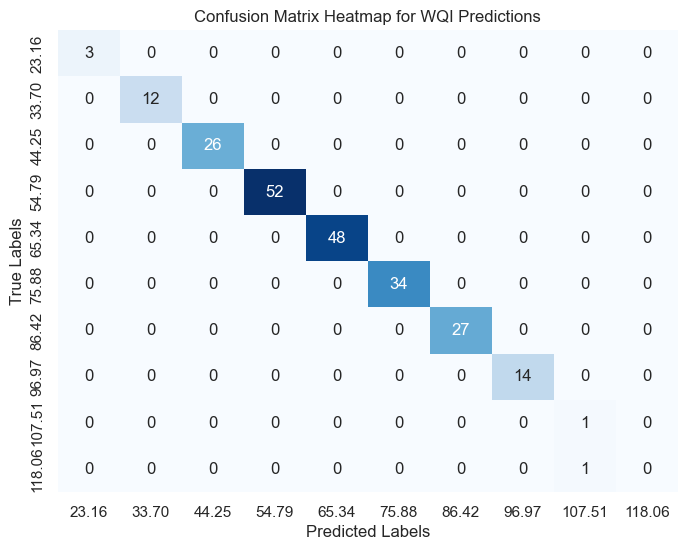

In [95]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# Example: Train a Linear Regression model
model = LinearRegression()

# Assuming you have your data (X_train and y_train)
model.fit(X_train, y_train)

# Save the trained model
with open("../ml_model_WQI/linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R² (R-squared) for accuracy
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Accuracy): {r2}")

# Calculate Mean Squared Error (optional)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize Confusion Matrix (Discretized predictions)
# Convert continuous predicted and actual values to categories (bins)
bins = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 10)
y_test_binned = np.digitize(y_test, bins) - 1
y_pred_binned = np.digitize(y_pred, bins) - 1

# Compute confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[f'{b:.2f}' for b in bins], yticklabels=[f'{b:.2f}' for b in bins])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix Heatmap for WQI Predictions')
plt.show()


### Decision Tree

Accuracy = 0.9220183486238532


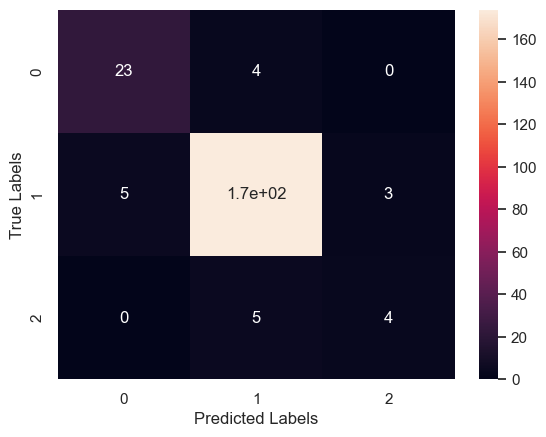

Enter the DO value:  6.35
Enter the pH value:  7.65
Enter the EC value:  815.5
Enter the NN value:  2.260


The predicted WQI value is: 0
Mean Squared Error = 0.0779816513761468
R² Score = 0.5074428495481127


In [119]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth':range(3,30)}
clf = GridSearchCV(DecisionTreeClassifier(random_state=seed),params,n_jobs=5)
clf.fit(X_train_,y_c_train)
dt = clf.best_estimator_
y_c_hat4 = dt.predict(X_test_)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat4)}')
cm = confusion_matrix(y_c,y_c_hat4)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
do = float(input("Enter the DO value: "))
ph = float(input("Enter the pH value: "))
ec = float(input("Enter the EC value: "))
nn = float(input("Enter the NN value: "))

# Create a list or array of the input values (as the model expects a 2D array)
input_data = [[do, ph, ec, nn]]
predicted_wqi  = dt.predict(input_data)
print(f"The predicted WQI value is: {predicted_wqi[0]}")
y_c_hat4 = dt.predict(X_test_)

# Performance metrics
print(f'Mean Squared Error = {mean_squared_error(y_c, y_c_hat4)}')
print(f'R² Score = {r2_score(y_c, y_c_hat4)}')


### Feedforward Neural Network

In [71]:
import torch
from torch.utils.data import DataLoader,TensorDataset

def mask(class_arr):
    m = np.zeros((len(class_arr),5),dtype=int)
    for i,v in enumerate(class_arr):
        m[i,v] = 1
    return m

#converting all dataframes to pytorch tensors
X_train_tensor = torch.Tensor(X_train_)
train_target = torch.Tensor(mask(y_c_train))
X_test_tensor = torch.Tensor(X_test_)
test_target = torch.Tensor(mask(y_c))

#grouping training and test data
training_data = TensorDataset(X_train_tensor,train_target)
test_data = TensorDataset(X_test_tensor,test_target)

params = {'batch_size': 16,
          'shuffle': True}
train_loader = DataLoader(training_data,**params)
test_loader = DataLoader(test_data,**params)

print(len(training_data))

869


In [72]:
from torch import nn

model = nn.Sequential(
    nn.Linear(4, 8),  # Change input size to 4
    nn.ELU(),
    nn.Linear(8, 8),
    nn.ELU(),
    nn.Linear(8, 8),
    nn.ELU(),
    nn.Linear(8, 5),
    nn.Softmax(dim=1)
)



print(model)

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): ELU(alpha=1.0)
  (6): Linear(in_features=8, out_features=5, bias=True)
  (7): Softmax(dim=1)
)


In [73]:
dummy_run = torch.rand(10,4)
print(model(dummy_run))

tensor([[0.1629, 0.2018, 0.2087, 0.1784, 0.2482],
        [0.1624, 0.2036, 0.1993, 0.1824, 0.2523],
        [0.1642, 0.2100, 0.1955, 0.1783, 0.2520],
        [0.1609, 0.2044, 0.2029, 0.1804, 0.2514],
        [0.1641, 0.2037, 0.2015, 0.1812, 0.2495],
        [0.1640, 0.2056, 0.1907, 0.1823, 0.2574],
        [0.1611, 0.2037, 0.2037, 0.1777, 0.2537],
        [0.1615, 0.2064, 0.2083, 0.1760, 0.2478],
        [0.1615, 0.2068, 0.1962, 0.1805, 0.2549],
        [0.1634, 0.2109, 0.1961, 0.1764, 0.2532]], grad_fn=<SoftmaxBackward0>)


In [79]:
loss_fn = nn.CrossEntropyLoss(weight = torch.Tensor([4,1,1.2,1.2,1]))
opt = torch.optim.Adam(model.parameters(),lr=1e-3)
epochs = 250

def train_loop(dataloader):
    size = len(dataloader.dataset)
    n = len(dataloader)
    avg_loss = 0
    for batch,(x,y_true) in enumerate(dataloader):
        print(x.shape)
        opt.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred,y_true)
        avg_loss += loss.item()
        loss.backward()
        opt.step()
        if (batch+1) % 5 == 0:
            ce_loss = loss.item()
            current = (batch+1)*len(x)
            print(f'loss = {ce_loss}, [{current}/{size}]')
        if batch == n - 1 :
            avg_loss/=n
            return avg_loss
    
def test_loop(dataloader):
    size = len(dataloader.dataset)
    n = len(dataloader)
    test_loss,correct = 0,0
    with torch.no_grad():
        for x,y_true in dataloader:
            y_pred = model(x)
            test_loss += loss_fn(y_pred,y_true).item()
            correct += (y_pred.argmax(1)==y_true.argmax(1)).type(torch.float).sum().item()
    test_loss /= n
    correct /= size
    print(f'Test Loss = {test_loss} ; Test Accuracy = {correct}')
    return test_loss
            
train_losses = []
test_losses = []
    
for epoch in range(epochs):
    print(f'Epoch {epoch+1}')
    avg_train_loss = train_loop(train_loader)
    if (epoch+1)%10 == 0:
        test_losses.append(test_loop(test_loader))
        train_losses.append(avg_train_loss)
    print()

Epoch 1
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
loss = 1.5001120567321777, [80/869]
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
loss = 0.9065284729003906, [160/869]
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
loss = 1.33045494556427, [240/869]
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
loss = 1.2441449165344238, [320/869]
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
loss = 1.0745577812194824, [400/869]
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
loss = 1.1637635231018066, [480/869]
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
loss = 1.0744884014129639, [560/869]
torch.Size([16, 4])
torch.Size([16, 

loss = 1.03501558303833, [240/844]
loss = 1.0458228588104248, [320/844]
loss = 1.2641754150390625, [400/844]
loss = 0.9693204164505005, [480/844]
loss = 1.7460877895355225, [560/844]
loss = 1.1777929067611694, [640/844]
loss = 0.9900532960891724, [720/844]
loss = 1.1447758674621582, [800/844]
Test Loss = 1.2153097646577018 ; Test Accuracy = 0.9241706161137441

Epoch 181
loss = 1.3757100105285645, [80/844]
loss = 1.214278221130371, [160/844]
loss = 1.2423328161239624, [240/844]
loss = 1.1809667348861694, [320/844]
loss = 1.2928881645202637, [400/844]
loss = 1.1269609928131104, [480/844]
loss = 1.5168051719665527, [560/844]
loss = 0.9859752655029297, [640/844]
loss = 1.5907435417175293, [720/844]
loss = 1.3817198276519775, [800/844]

Epoch 182
loss = 1.0153107643127441, [80/844]
loss = 1.3277937173843384, [160/844]
loss = 1.1613150835037231, [240/844]
loss = 1.1563676595687866, [320/844]
loss = 1.6590521335601807, [400/844]
loss = 1.3910561800003052, [480/844]
loss = 1.200046420097351, [

loss = 1.3808330297470093, [480/844]
loss = 1.3249279260635376, [560/844]
loss = 1.9042649269104004, [640/844]
loss = 1.0596131086349487, [720/844]
loss = 1.1232324838638306, [800/844]

Epoch 203
loss = 1.3821738958358765, [80/844]
loss = 1.1456458568572998, [160/844]
loss = 1.029653787612915, [240/844]
loss = 1.4775736331939697, [320/844]
loss = 1.4273439645767212, [400/844]
loss = 1.1049803495407104, [480/844]
loss = 1.3913453817367554, [560/844]
loss = 1.5095700025558472, [640/844]
loss = 1.1251240968704224, [720/844]
loss = 1.2046034336090088, [800/844]

Epoch 204
loss = 1.2500959634780884, [80/844]
loss = 1.0558717250823975, [160/844]
loss = 1.212175965309143, [240/844]
loss = 1.2326486110687256, [320/844]
loss = 1.177051067352295, [400/844]
loss = 1.3179340362548828, [480/844]
loss = 1.2197842597961426, [560/844]
loss = 1.3479547500610352, [640/844]
loss = 1.0234225988388062, [720/844]
loss = 1.1913496255874634, [800/844]

Epoch 205
loss = 1.0226478576660156, [80/844]
loss = 1.29

loss = 1.341100811958313, [320/844]
loss = 1.5997278690338135, [400/844]
loss = 1.0467387437820435, [480/844]
loss = 2.1160099506378174, [560/844]
loss = 1.5629421472549438, [640/844]
loss = 1.353947639465332, [720/844]
loss = 1.3770703077316284, [800/844]

Epoch 225
loss = 1.0735722780227661, [80/844]
loss = 0.981637179851532, [160/844]
loss = 1.3600568771362305, [240/844]
loss = 1.2514715194702148, [320/844]
loss = 1.069580316543579, [400/844]
loss = 1.1301766633987427, [480/844]
loss = 1.3600523471832275, [560/844]
loss = 1.2795426845550537, [640/844]
loss = 1.3711621761322021, [720/844]
loss = 1.1842072010040283, [800/844]

Epoch 226
loss = 1.3014832735061646, [80/844]
loss = 1.2458704710006714, [160/844]
loss = 1.4037408828735352, [240/844]
loss = 1.1127638816833496, [320/844]
loss = 0.9995595216751099, [400/844]
loss = 1.2199370861053467, [480/844]
loss = 1.1232277154922485, [560/844]
loss = 1.3352047204971313, [640/844]
loss = 1.2712492942810059, [720/844]
loss = 1.8060238361358

loss = 1.0153456926345825, [800/844]

Epoch 246
loss = 1.6981351375579834, [80/844]
loss = 1.6620508432388306, [160/844]
loss = 1.1474334001541138, [240/844]
loss = 1.4232873916625977, [320/844]
loss = 1.172229290008545, [400/844]
loss = 0.9492244124412537, [480/844]
loss = 1.2771152257919312, [560/844]
loss = 1.1149872541427612, [640/844]
loss = 1.6128953695297241, [720/844]
loss = 1.2250754833221436, [800/844]

Epoch 247
loss = 1.5717625617980957, [80/844]
loss = 1.0099735260009766, [160/844]
loss = 1.565011739730835, [240/844]
loss = 1.4748144149780273, [320/844]
loss = 1.1199264526367188, [400/844]
loss = 1.0883374214172363, [480/844]
loss = 1.024862289428711, [560/844]
loss = 1.267590045928955, [640/844]
loss = 1.7615357637405396, [720/844]
loss = 1.7744128704071045, [800/844]

Epoch 248
loss = 1.6059616804122925, [80/844]
loss = 1.3605517148971558, [160/844]
loss = 1.5025606155395508, [240/844]
loss = 1.4660555124282837, [320/844]
loss = 1.2825953960418701, [400/844]
loss = 1.235

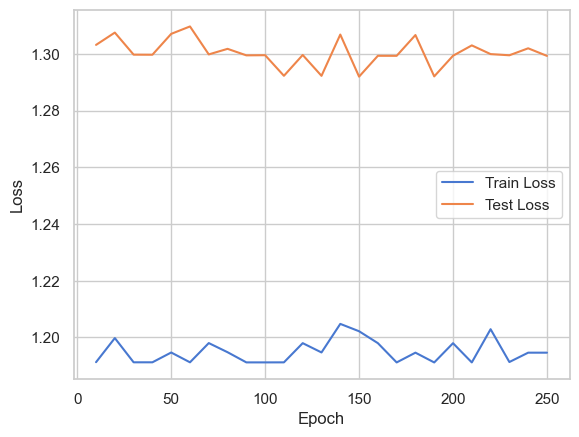

In [82]:
epoch_count = list(range(10,epochs+1,10))
plt.plot(epoch_count,train_losses,label='Train Loss')
plt.plot(epoch_count,test_losses,'-',label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Accuracy = 0.9541284403669725


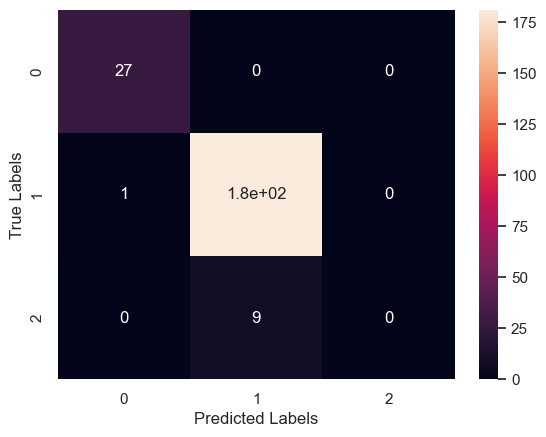

In [87]:
y_c_hat5 = model(X_test_tensor).argmax(1).detach().cpu().numpy()
print(f'Accuracy = {accuracy_score(y_c,y_c_hat5)}')
cm = confusion_matrix(y_c,y_c_hat5)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [91]:
torch.save(model.state_dict(),"./fcnn_state.pth")

In [ ]:
#Load from saved file after first attempt instead of retraining entire model

'''
model = nn.Sequential(
    nn.Linear(3,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,5),
    nn.Softmax(dim=1)
)
model.load_state_dict("./fcnn_state.pth")
'''

# Comparison of Models

In [93]:
from sklearn.metrics import f1_score,cohen_kappa_score

preds = [y_c_hat,y_c_hat2,y_c_hat3,y_c_hat4,y_c_hat5]
labels = ['OLS','SVR','MLR','DT','ANN']
metrics = ['F1 Score','Kappa','Accuracy']
f1_scores = []
kappas = []
accuracies = []

for pred in preds:
    f1_scores.append(f1_score(y_c,pred,average='macro'))
    kappas.append(cohen_kappa_score(y_c,pred))
    accuracies.append(accuracy_score(y_c,pred))

d = {
    'F1 Score' : f1_scores,
    'Kappa' : kappas,
    'Accuracy' : accuracies
}
score_df = pd.DataFrame(data=d,index=labels)

score_df

NameError: name 'y_c_hat2' is not defined

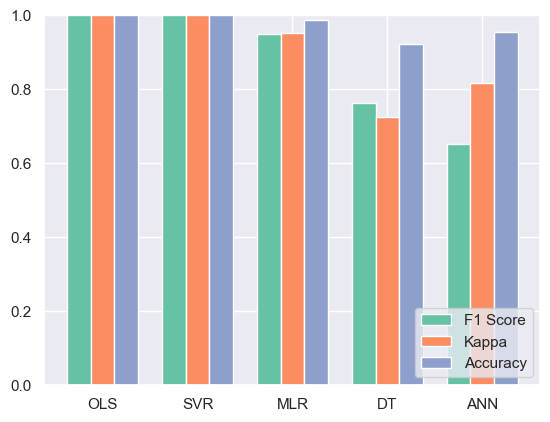

In [218]:
sns.set_palette(sns.color_palette("Set2"))
sns.set_style('darkgrid')

x = np.arange(len(labels))
width = 0.25 
multiplier = 0

fig, ax = plt.subplots()
for attr, val in d.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=attr)
    multiplier += 1

ax.set_xticks(x + width, labels)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)

plt.show()